In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

health = pd.read_csv('Mental health Depression disorder Data.csv')

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_19393/300513165.py:8: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('Mental health Depression disorder Data.csv')


In [3]:
health.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [4]:
# builting the dataframe
    # create new df with countries we're interested in studying
    # fix the index 
    # added variable for whether it has universal healthcare or not
    
developed = health.loc[health['Entity'].isin(['United States','Japan','Argentina','Australia','United Kingdom', 'South Korea','Denmark','Canada','France','Taiwan','Uruguay','Germany','Norway','Austria','Belgium','Netherlands', 'Finland','Thailand','United Arab Emirates', 'Sweden', 'Switzerland', 'Chile', 'Costa Rica', 'Mexico', 'Ireland', 'Italy', 'Spain', 'Portugal', 'Brazil', 'Israel','Luxembourg','Singapore'])]
developed.head()
developed = developed.reset_index(drop=True)

developed = developed.drop('index', axis=1)

# have universal care or practically universal care (for example may be small co-pays)
developed["Universal Care"] = np.nan

developed["Universal Care"] = np.where(developed['Entity'] == 'United States', 0,1) 




In [5]:
map_names = {'Entity': 'country',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo', 
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating_dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

developed.rename(columns=map_names,inplace=True)



# just for years 1990 - 2017

developed = developed.loc[developed['year'].isin(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'])] 



In [6]:
# dropping NA
developed1 = developed.dropna()

len(developed1)

896

In [7]:
# using numpy to split into 2 by 70% for training set and the remaining for the rest
developed2 = developed1.sample(frac = 1)
train,test = np.split(developed2,[int(0.80 * len(developed2))])



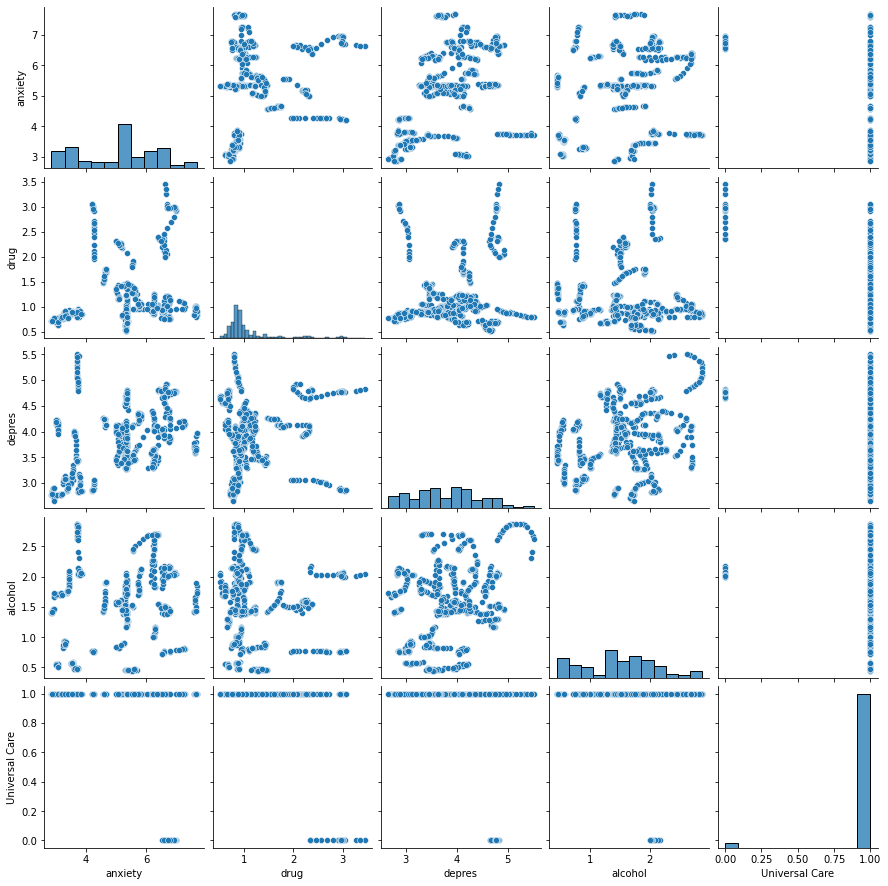

In [8]:
sns.pairplot(train)
plt.show()

In [9]:
ed_obj = smf.ols(formula = 'depres~alcohol+drug+anxiety', data = train).fit()
ed_obj.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     82.15
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           1.20e-45
Time:                        11:30:45   Log-Likelihood:                -583.45
No. Observations:                 716   AIC:                             1175.
Df Residuals:                     712   BIC:                             1193.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3599      0.094     25.203      0.000       2.176       2.544
alcohol        0.2165      0.034      6.313      0.000       0.149       0.284
drug           0.1071      0.038      2.807      0.005       0.032       0.182
anxiety        0.1922      0.017     11.420      0.000       0.159       0.225
==============================================================================
Omnibus:                       51.217   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.225
Skew:                           0.716   Prob(JB):                     5.07e-14
Kurtosis:                       3.015   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
ed_obj_2 = smf.ols(formula = 'depres~alcohol+drug+anxiety+alcohol*drug+ drug*anxiety + alcohol*anxiety + I(alcohol**3) + +I(alcohol**2) + I(drug**3) + I(drug**2) + I(anxiety**3) + I(anxiety**2)',
                 data = train).fit()
ed_obj_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depres   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     82.83
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          9.75e-126
Time:                        11:30:46   Log-Likelihood:                -374.38
No. Observations:                 716   AIC:                             774.8
Df Residuals:                     703   BIC:                             834.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9134      1.150     -0.794      0.427      -3.171       1.344
alcohol             1.9132      0.449      4.259      0.000       1.031       2.795
drug               -8.7822      0.548    -16.018      0.000      -9.859      -7.706
anxiety             4.2730      0.709      6.024      0.000       2.880       5.666
alcohol:drug        0.6202      0.102      6.107      0.000       0.421       0.820
drug:anxiety        0.1764      0.052      3.387      0.001       0.074       0.279
alcohol:anxiety    -0.0892      0.025     -3.548      0.000      -0.139      -0.040
I(alcohol ** 3)     0.4960      0.065      7.626      0.000       0.368       0.624
I(alcohol ** 2)    -1.9301      0.320     -6.034      0.000      -2.558      -1.302
I(drug ** 3)       -0.7221      0.058    -12.380      0.000      -0.837      -0.608
I(drug ** 2)        4.1062      0.319     12.857      0.000       3.479       4.733
I(anxiety ** 3)     0.0363      0.009      4.041      0.000       0.019       0.054
I(anxiety ** 2)    -0.6894      0.144     -4.789      0.000      -0.972      -0.407
==============================================================================
Omnibus:                       19.133   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.481
Skew:                           0.365   Prob(JB):                     3.57e-05
Kurtosis:                       3.393   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""